# Clash of Clans CWL

## Decision Tree

* Your Name: Nolan Clark
* Name of API: Clash of Clans API
* Link to main page of API documentation: https://developer.clashofclans.com/#/documentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import graphviz
from sklearn.ensemble import BaggingClassifier

In [2]:
df = pd.read_csv("JulyModelDF.csv",index_col=0, keep_default_na=False, na_values='')
master1 =df[df.league == 'Master League I']

/Users/Nolan/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
clans=df.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()
m_clans =master1.groupby(['clan_tag','league','result','group_rank']).sum().reset_index()
clans_extra = pd.read_csv("JulyCWLgroupPerformanceDF.csv",index_col=0, keep_default_na=False, na_values='')

In [4]:
july = pd.read_csv("CC_July.csv",index_col=0, keep_default_na=False, na_values='')
july.rename(columns={'rank':'group_rank'}, inplace = True)
coop=july[july['clan_tag'] == '#2QVRL0RR']
july_extra = pd.read_csv("CC_July_Performance.csv",index_col=0, keep_default_na=False, na_values='')

In [5]:
league_order = [ 'Gold League III',
                'Gold League II',
                'Gold League I',
                'Crystal League III',
                'Crystal League II',
                'Crystal League I',
                'Master League III',
                'Master League II',
                'Master League I',
                'Champion League III',
                'Champion League II',
                'Champion League I'
               ]
size_order = ['PROMOTED','REMAINED','DROPPED']

In [6]:
for x in enumerate(league_order):
    print({x[1]:x[0]})

{'Gold League III': 0}
{'Gold League II': 1}
{'Gold League I': 2}
{'Crystal League III': 3}
{'Crystal League II': 4}
{'Crystal League I': 5}
{'Master League III': 6}
{'Master League II': 7}
{'Master League I': 8}
{'Champion League III': 9}
{'Champion League II': 10}
{'Champion League I': 11}


In [7]:
league_map = {x[1]:x[0] for x in enumerate(league_order)}

In [8]:
result_map = {'PROMOTED':0,
              'REMAINED':1,
              'DROPPED':2
}

In [9]:
clans['league']=clans['league'].map(league_map)
clans['result']=clans['result'].map(result_map)

In [10]:
m_clans['league']=m_clans['league'].map(league_map)
m_clans['result']=m_clans['result'].map(result_map)

In [11]:
july['league']=july['league'].map(league_map)
july['result']=july['result'].map(result_map)

In [12]:
july_clan=july.groupby(['clan','league','group_rank','result']).sum().reset_index()

In [13]:
features = ['A_stars','D_stars','A_Percent','D_Percent']
X= july_clan[features]
y=july_clan['result']

[Text(133.92000000000002, 181.2, 'A_Percent <= 7359.5\ngini = 0.531\nsamples = 8\nvalue = [1, 5, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(200.88000000000002, 108.72, 'A_stars <= 236.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]')]

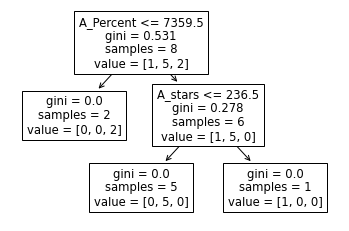

In [14]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [15]:
cwl_res=clans_extra.merge(clans[['clan_tag','league']] ,on ='clan_tag')

In [16]:
cwl_res['result']=cwl_res['result'].map(result_map)

In [17]:
cwl_res

,clan_tag,group_num,Tot_Clan_Damage,Tot_Clan_Stars,group_rank,result,league
0,#22QCRQQPL,0,505.400000,233,4.0,1,6
1,#2YYC0LVG0,0,368.666667,149,7.0,2,6
2,#80RUCPUG,0,503.200000,239,3.0,1,6
3,#LGRQ9J0L,0,488.200000,227,5.0,1,6
4,#LVPL8VJL,0,452.533333,214,6.0,1,6
...,...,...,...,...,...,...,...
10323,#928P89U9,1290,523.466667,245,4.0,1,7
10324,#99UP9G0G,1290,567.800000,254,3.0,1,7
10325,#9CC8U2VC,1290,524.600000,244,6.0,1,7
10326,#J22PPCQ,1290,500.666667,225,7.0,2,7


In [18]:
features = ['league','Tot_Clan_Damage']
X= cwl_res[features]
y=cwl_res['result']

[Text(167.4, 190.26, 'Tot_Clan_Damage <= 405.733\ngini = 0.531\nsamples = 10328\nvalue = [1291, 6455, 2582]'),
 Text(83.7, 135.9, 'league <= 3.5\ngini = 0.426\nsamples = 1997\nvalue = [5, 606, 1386]'),
 Text(41.85, 81.53999999999999, 'Tot_Clan_Damage <= 283.967\ngini = 0.506\nsamples = 851\nvalue = [5, 420, 426]'),
 Text(20.925, 27.180000000000007, 'gini = 0.313\nsamples = 350\nvalue = [0, 68, 282]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.424\nsamples = 501\nvalue = [5, 352, 144]'),
 Text(125.55000000000001, 81.53999999999999, 'Tot_Clan_Damage <= 363.033\ngini = 0.272\nsamples = 1146\nvalue = [0, 186, 960]'),
 Text(104.625, 27.180000000000007, 'gini = 0.105\nsamples = 646\nvalue = [0, 36, 610]'),
 Text(146.475, 27.180000000000007, 'gini = 0.42\nsamples = 500\nvalue = [0, 150, 350]'),
 Text(251.10000000000002, 135.9, 'Tot_Clan_Damage <= 560.567\ngini = 0.463\nsamples = 8331\nvalue = [1286, 5849, 1196]'),
 Text(209.25, 81.53999999999999, 'Tot_Clan_Damage <= 460.833\ngin

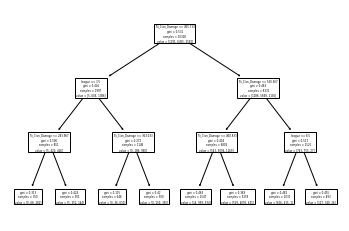

In [19]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [20]:
cwl_m1=cwl_res[cwl_res['league'] == 8]

[Text(152.96896551724137, 195.696, 'Tot_Clan_Stars <= 223.5\ngini = 0.531\nsamples = 768\nvalue = [96, 480, 192]'),
 Text(63.49655172413793, 152.208, 'Tot_Clan_Stars <= 219.5\ngini = 0.133\nsamples = 167\nvalue = [0, 12, 155]'),
 Text(23.089655172413792, 108.72, 'Tot_Clan_Stars <= 208.5\ngini = 0.077\nsamples = 149\nvalue = [0, 6, 143]'),
 Text(11.544827586206896, 65.232, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 95]'),
 Text(34.63448275862069, 65.232, 'Tot_Clan_Damage <= 477.633\ngini = 0.198\nsamples = 54\nvalue = [0, 6, 48]'),
 Text(23.089655172413792, 21.744, 'gini = 0.469\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(46.179310344827584, 21.744, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(103.90344827586206, 108.72, 'Tot_Clan_Damage <= 488.267\ngini = 0.444\nsamples = 18\nvalue = [0, 6, 12]'),
 Text(80.81379310344828, 65.232, 'Tot_Clan_Stars <= 220.5\ngini = 0.49\nsamples = 7\nvalue = [0, 4, 3]'),
 Text(69.26896551724138, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'

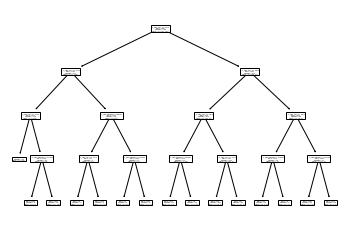

In [21]:
features = ['Tot_Clan_Damage','Tot_Clan_Stars']
X= cwl_m1[features]
y=cwl_m1['result']
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [22]:
dtree.predict([[534.066667, 261]])

array([1])

In [23]:
dtree.predict(july_extra[['Tot_Clan_Damage','Tot_Clan_Stars']])

array([0, 2, 1, 2, 1, 2, 1, 0])

In [24]:
avg_cwl=df.groupby(['clan','league','group_rank','result']).mean().reset_index()

In [25]:
avg_cwl['league']=avg_cwl['league'].map(league_map)
avg_cwl['result']=avg_cwl['result'].map(result_map)

In [26]:
tree_avg=avg_cwl.dropna()

In [27]:
m1_avg = tree_avg[tree_avg['league']==8]

[Text(162.6443181818182, 199.32, 'A_stars <= 1.952\ngini = 0.531\nsamples = 768\nvalue = [96, 480, 192]'),
 Text(70.38409090909092, 163.07999999999998, 'D_Percent <= 76.283\ngini = 0.412\nsamples = 155\nvalue = [0, 45, 110]'),
 Text(22.827272727272728, 126.83999999999999, 'A_stars <= 1.843\ngini = 0.399\nsamples = 40\nvalue = [0, 29, 11]'),
 Text(15.218181818181819, 90.6, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(30.436363636363637, 90.6, 'A_stars <= 1.897\ngini = 0.284\nsamples = 35\nvalue = [0, 29, 6]'),
 Text(15.218181818181819, 54.359999999999985, 'D_Percent <= 73.976\ngini = 0.494\nsamples = 9\nvalue = [0, 5, 4]'),
 Text(7.609090909090909, 18.119999999999976, 'gini = 0.408\nsamples = 7\nvalue = [0, 5, 2]'),
 Text(22.827272727272728, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(45.654545454545456, 54.359999999999985, 'D_Percent <= 75.883\ngini = 0.142\nsamples = 26\nvalue = [0, 24, 2]'),
 Text(38.04545454545455, 18.119999999999976, 'gini = 0.0

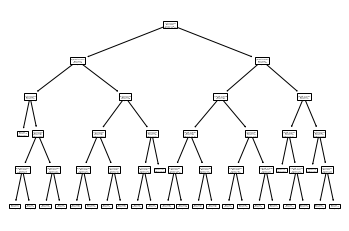

In [28]:
features = ['A_stars','A_Percent','D_stars','D_Percent']
X= m1_avg[features]
y=m1_avg['result']

dtree = DecisionTreeClassifier(max_depth=5)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

[Text(119.83136325960379, 214.57894736842104, 'A_stars <= 1.911\ngini = 0.531\nsamples = 10319\nvalue = [1290, 6453, 2576]'),
 Text(24.917456341496475, 208.85684210526315, 'D_stars <= 2.038\ngini = 0.48\nsamples = 2147\nvalue = [2, 854, 1291]'),
 Text(12.156365540523094, 203.13473684210527, 'league <= 7.5\ngini = 0.449\nsamples = 474\nvalue = [2, 315, 157]'),
 Text(8.42462078180269, 197.41263157894736, 'A_stars <= 1.84\ngini = 0.426\nsamples = 441\nvalue = [2, 307, 132]'),
 Text(5.10172148924634, 191.69052631578947, 'D_stars <= 1.881\ngini = 0.489\nsamples = 193\nvalue = [0, 111, 82]'),
 Text(3.902873667088379, 185.96842105263158, 'league <= 5.5\ngini = 0.257\nsamples = 33\nvalue = [0, 28, 5]'),
 Text(3.626258036198394, 180.24631578947367, 'A_stars <= 1.698\ngini = 0.08\nsamples = 24\nvalue = [0, 23, 1]'),
 Text(3.4879502207534014, 174.52421052631578, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(3.764565851643386, 174.52421052631578, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0

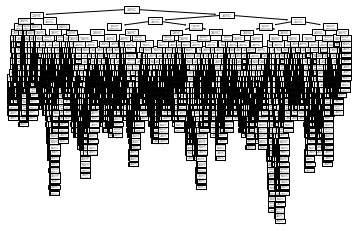

In [29]:
features = ['A_stars','D_stars','league']
X= tree_avg[features]
y=tree_avg['result']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [30]:
dtree.predict([[2,2,8]])

array([1])

In [31]:
for i in range(12):
    print(league_order[i],dtree.predict([[2,2.1,i]]))

Gold League III [1]
Gold League II [1]
Gold League I [1]
Crystal League III [1]
Crystal League II [1]
Crystal League I [1]
Master League III [2]
Master League II [2]
Master League I [2]
Champion League III [1]
Champion League II [1]
Champion League I [1]


# Confusion Matrix

[Text(146.47500000000002, 195.696, 'A_stars <= 201.5\ngini = 0.528\nsamples = 576\nvalue = [68, 361, 147]'),
 Text(69.75, 152.208, 'star_diff <= -2.5\ngini = 0.312\nsamples = 129\nvalue = [0, 25, 104]'),
 Text(41.85, 108.72, 'D_stars <= 216.5\ngini = 0.215\nsamples = 114\nvalue = [0, 14, 100]'),
 Text(27.900000000000002, 65.232, 'D_stars <= 185.0\ngini = 0.384\nsamples = 54\nvalue = [0, 14, 40]'),
 Text(13.950000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(41.85, 21.744, 'gini = 0.37\nsamples = 53\nvalue = [0, 13, 40]'),
 Text(55.800000000000004, 65.232, 'gini = 0.0\nsamples = 60\nvalue = [0, 0, 60]'),
 Text(97.65, 108.72, 'A_stars <= 195.5\ngini = 0.391\nsamples = 15\nvalue = [0, 11, 4]'),
 Text(83.7, 65.232, 'D_stars <= 197.5\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(69.75, 21.744, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(97.65, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\ns

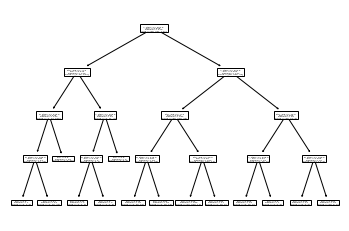

In [32]:
# The decision tree for master league CWL ~ 70-80% accuracy
train,test = train_test_split(m_clans, test_size=0.25)
features = ['A_stars','D_stars','star_diff']
target = 'result'
X= train[features]
y=train[target]
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [33]:
d_tree = tree.export_graphviz(dtree,out_file=None, 
                              feature_names=features, 
                              filled=True, 
                              class_names=size_order, 
                              special_characters= True)

In [34]:
# Create a PDF of Decision Tree
graph = graphviz.Source(d_tree)
graph.render("Master League I Tree")

'Master League I Tree.pdf'

In [35]:
r = export_text(dtree, feature_names=features)

In [36]:
print(r)

|--- A_stars <= 201.50
|   |--- star_diff <= -2.50
|   |   |--- D_stars <= 216.50
|   |   |   |--- D_stars <= 185.00
|   |   |   |   |--- class: 1
|   |   |   |--- D_stars >  185.00
|   |   |   |   |--- class: 2
|   |   |--- D_stars >  216.50
|   |   |   |--- class: 2
|   |--- star_diff >  -2.50
|   |   |--- A_stars <= 195.50
|   |   |   |--- D_stars <= 197.50
|   |   |   |   |--- class: 1
|   |   |   |--- D_stars >  197.50
|   |   |   |   |--- class: 2
|   |   |--- A_stars >  195.50
|   |   |   |--- class: 1
|--- A_stars >  201.50
|   |--- A_stars <= 224.50
|   |   |--- star_diff <= -5.50
|   |   |   |--- D_stars <= 215.50
|   |   |   |   |--- class: 1
|   |   |   |--- D_stars >  215.50
|   |   |   |   |--- class: 2
|   |   |--- star_diff >  -5.50
|   |   |   |--- star_diff <= 20.50
|   |   |   |   |--- class: 1
|   |   |   |--- star_diff >  20.50
|   |   |   |   |--- class: 1
|   |--- A_stars >  224.50
|   |   |--- star_diff <= 16.50
|   |   |   |--- A_stars <= 236.00
|   |   |   |  

In [37]:
actual = np.array(test[target])
predicted=dtree.predict(test[features])
cm = metrics.confusion_matrix(actual,predicted)

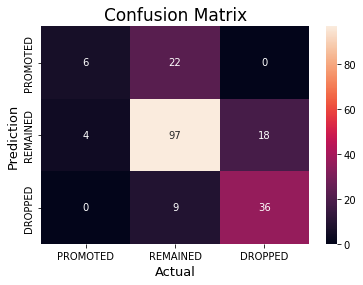

Accuracy   : 0.7239583333333334
Precision : 0.7134358723958334
Recall    : 0.7239583333333334
F1-score  : 0.7033071095571096


In [38]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=size_order,
            yticklabels=size_order
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

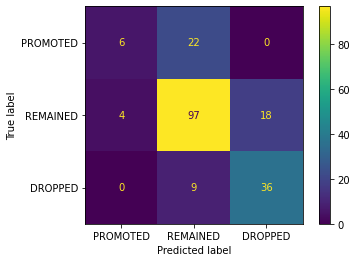

In [39]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=size_order)
cm_display.plot()

In [40]:
np.array(july_clan[target])

array([1, 0, 2, 2, 1, 1, 1, 1])

In [41]:
dtree.predict(july_clan[features])

array([2, 0, 2, 2, 1, 0, 1, 1])

## Bootstrap

[Text(118.83096330275228, 210.192, 'star_diff <= -9.5\ngini = 0.533\nsamples = 576\nvalue = [80, 361, 135]'),
 Text(35.06697247706422, 195.696, 'D_stars <= 219.5\ngini = 0.39\nsamples = 128\nvalue = [0, 34, 94]'),
 Text(13.822018348623853, 181.2, 'A_stars <= 195.0\ngini = 0.489\nsamples = 66\nvalue = [0, 28, 38]'),
 Text(4.095412844036697, 166.704, 'A_stars <= 187.5\ngini = 0.269\nsamples = 25\nvalue = [0, 4, 21]'),
 Text(2.0477064220183485, 152.208, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(6.143119266055045, 152.208, 'D_stars <= 204.0\ngini = 0.408\nsamples = 14\nvalue = [0, 4, 10]'),
 Text(4.095412844036697, 137.712, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(8.190825688073394, 137.712, 'star_diff <= -16.0\ngini = 0.278\nsamples = 12\nvalue = [0, 2, 10]'),
 Text(6.143119266055045, 123.216, 'D_stars <= 215.0\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(4.095412844036697, 108.72, 'A_stars <= 191.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(2

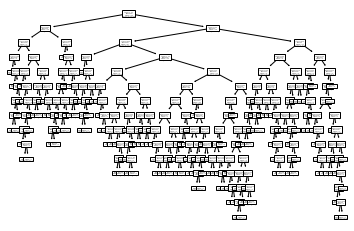

In [42]:
# The decision tree for master league CWL ~ 70% accuracy...

# bootstrapping to attempt greater accuracy -> 4% improvement

train,test = train_test_split(m_clans, test_size=0.25, random_state=22)
features = ['A_stars','D_stars','star_diff']
target = 'result'
X= train[features]
y=train[target]
dtree = DecisionTreeClassifier(random_state=22)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [43]:
print("Train data accuracy:",accuracy_score(y_true = train[target], y_pred = dtree.predict(train[features])))
print("Test data accuracy:",accuracy_score(y_true = test[target], y_pred = dtree.predict(test[features])))

Train data accuracy: 0.9965277777777778
Test data accuracy: 0.7083333333333334


In [44]:

estimator_range = [2,4,6,8,10,12,14,16]

In [45]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(train[features], train[target])

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = test[target], y_pred = clf.predict(test[features])))

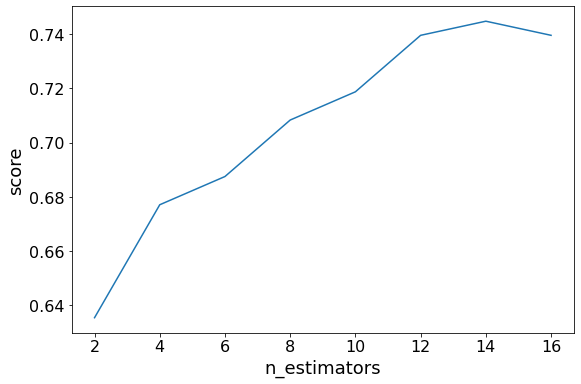

In [46]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

0.7274305555555556


[Text(132.15398936170214, 211.4, 'X[2] <= -5.5\ngini = 0.55\nsamples = 365\nvalue = [88, 350, 138]'),
 Text(37.041702127659576, 199.32, 'X[0] <= 199.5\ngini = 0.426\nsamples = 103\nvalue = [0, 51, 115]'),
 Text(15.196595744680852, 187.24, 'X[1] <= 214.5\ngini = 0.219\nsamples = 53\nvalue = [0, 10, 70]'),
 Text(11.39744680851064, 175.16, 'X[2] <= -26.5\ngini = 0.369\nsamples = 27\nvalue = [0, 10, 31]'),
 Text(7.598297872340426, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(15.196595744680852, 163.07999999999998, 'X[0] <= 195.5\ngini = 0.326\nsamples = 26\nvalue = [0, 8, 31]'),
 Text(7.598297872340426, 151.0, 'X[1] <= 213.5\ngini = 0.087\nsamples = 13\nvalue = [0, 1, 21]'),
 Text(3.799148936170213, 138.92000000000002, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 21]'),
 Text(11.39744680851064, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(22.79489361702128, 151.0, 'X[2] <= -7.5\ngini = 0.484\nsamples = 13\nvalue = [0, 7, 10]'),
 Text(18.

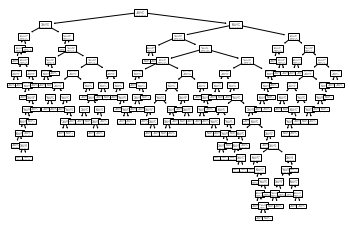

In [47]:
train,test = train_test_split(m_clans, test_size=0.25, random_state=22)
features = ['A_stars','D_stars','star_diff']
target = 'result'
X= train[features]
y=train[target]

oob_model = BaggingClassifier(n_estimators = 14, oob_score = True,random_state = 22)

oob_model.fit(X,y)

print(oob_model.oob_score_)

tree.plot_tree(oob_model.estimators_[0])

In [48]:
print("Train data accuracy:",accuracy_score(y_true = train[target], y_pred = oob_model.predict(train[features])))
print("Test data accuracy:",accuracy_score(y_true = test[target], y_pred = oob_model.predict(test[features])))

Train data accuracy: 0.9791666666666666
Test data accuracy: 0.7447916666666666


In [49]:
actual = np.array(test[target])
predicted=oob_model.predict(test[features])
cm = metrics.confusion_matrix(actual,predicted)

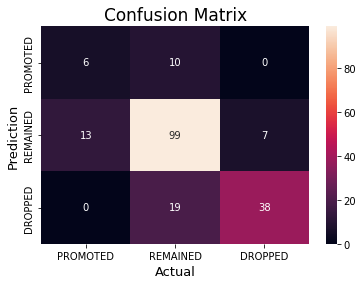

Accuracy   : 0.7447916666666666
Precision : 0.7563803511056286
Recall    : 0.7447916666666666
F1-score  : 0.7466094534979982


In [50]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=size_order,
            yticklabels=size_order
           )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#finding precision and recall
accuracy = accuracy_score(actual,predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual,predicted,average='weighted')
print("Precision :", precision)
recall = recall_score(actual,predicted,average='weighted')
print("Recall    :", recall)
F1_score = f1_score(actual,predicted,average='weighted')
print("F1-score  :", F1_score)

## Cross- Validation

In [51]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit

In [52]:
# K-Fold

features = ['A_stars','D_stars','star_diff']
target = 'result'

X = m_clans[features]
y= m_clans[target]

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits=5)

scores = cross_val_score(clf, X, y, cv=k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.72727273 0.73376623 0.74675325 0.67973856 0.63398693]
Average CV Score:  0.7043035395976573
Number of CV Scores used in Average:  5


In [53]:
# Straitfied K-Fold

features = ['A_stars','D_stars','star_diff']
target = 'result'

X = m_clans[features]
y= m_clans[target]

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits=5)

scores = cross_val_score(clf, X, y, cv= sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.69480519 0.71428571 0.72077922 0.66013072 0.64052288]
Average CV Score:  0.6861047449282743
Number of CV Scores used in Average:  5


In [54]:
# Leave-One-Out(LOO)

features = ['A_stars','D_stars','star_diff']
target = 'result'

X = m_clans[features]
y= m_clans[target]

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv= loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 

In [55]:
# Leave-P-Out(LPO)
# Leave P out is exhaustive, runs very long. Test running with 20 rows of data used 190 CV, 30 rows = 435 CV
# ***O(n^2)***

features = ['A_stars','D_stars','star_diff']
target = 'result'

X = m_clans[features][:30]
y= m_clans[target][:30]

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv= lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5
 1.  1.  0.5 1.  1.  0.5 1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  1.
 1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  0.5 1.  1.  0.5 1.  1.
 1.  0.5 1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.
 0.5 1.  1.  0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  1.  0.5 1.  1.  1.  1.
 1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  0.5 0.5 1.  0.5 1.  1.  1.
 0.5 1.  0.5 1.  1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.
 0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5 1.  1.
 1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  0.  1.  1.  0.5 1.  1.  1.
 0.5 1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.  0.5 1.  1.
 0.5 1.  1.  1.  0.5 1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5 1.  1.
 0.5 1.  1.  0.5 1.  1.  1.  0.5 1.  1.  1.  0.5 0.5 1.  1.  1.  1.  0.5
 1.  1.  0.5 1.  1.  0.5 1.  1.  1.

In [56]:
# Shuffle Split

features = ['A_stars','D_stars','star_diff']
target = 'result'

X = m_clans[features]
y= m_clans[target]

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6,test_size=0.3,n_splits = 5)

scores = cross_val_score(clf, X, y, cv= ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.68398268 0.67099567 0.7012987  0.67965368 0.6969697 ]
Average CV Score:  0.6865800865800866
Number of CV Scores used in Average:  5


[Text(167.4, 195.696, 'star_diff <= -9.5\ngini = 0.512\nsamples = 576\nvalue = [65, 372, 139]'),
 Text(83.7, 152.208, 'D_stars <= 210.5\ngini = 0.333\nsamples = 128\nvalue = [0, 27, 101]'),
 Text(41.85, 108.72, 'A_stars <= 193.5\ngini = 0.499\nsamples = 29\nvalue = [0, 15, 14]'),
 Text(20.925, 65.232, 'D_stars <= 201.0\ngini = 0.18\nsamples = 10\nvalue = [0, 1, 9]'),
 Text(10.4625, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(31.387500000000003, 21.744, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(62.775000000000006, 65.232, 'star_diff <= -14.5\ngini = 0.388\nsamples = 19\nvalue = [0, 14, 5]'),
 Text(52.3125, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(73.2375, 21.744, 'gini = 0.459\nsamples = 14\nvalue = [0, 9, 5]'),
 Text(125.55000000000001, 108.72, 'A_stars <= 197.5\ngini = 0.213\nsamples = 99\nvalue = [0, 12, 87]'),
 Text(104.625, 65.232, 'D_stars <= 214.5\ngini = 0.039\nsamples = 50\nvalue = [0, 1, 49]'),
 Text(94.16250000000001, 21.744, 'g

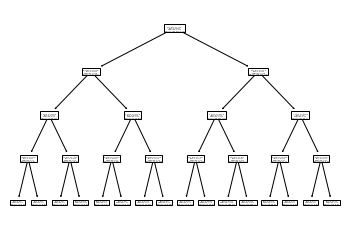

In [57]:
# The decision tree for master league CWL ~ 73-83% accuracy
train,test = train_test_split(m_clans, test_size=0.25)
features = ['A_stars','D_stars','star_diff']
target = 'result'
X= train[features]
y=train[target]
dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X,y)

tree.plot_tree(dtree,feature_names=features)

In [58]:
m_clans.groupby('result')['league'].count()

result
0     96
1    480
2    192
Name: league, dtype: int64

In [59]:
actual = np.array(test[target])
predicted=dtree.predict(test[features])
cm = metrics.confusion_matrix(actual,predicted)

In [60]:
print(cm)

[[12 19  0]
 [ 2 95 11]
 [ 0 18 35]]


In [61]:
accuracy_score(predicted,actual)

0.7395833333333334